In [3]:
from perceval.components import catalog
from perceval.converters import QiskitConverter, MyQLMConverter
from perceval.algorithm import Analyzer, Sampler
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

import numpy as np
import perceval as pcvl

In [4]:
def ccz_gate(circuit, ctrl1, ctrl2, target):

    # 1. Apply Hadamard gate on target qubit
    circuit.h(target)

    # ******************************************************************** #

    # 2. Apply Hadamard gate on target qubit
    circuit.h(target)
    
    # 3. Apply CNOT gate with ctrl1 as control and target as target
    circuit.cx(ctrl1, target)
    
    # 4. Apply TDG gate on target qubit
    circuit.tdg(target)
    
    # 5. Apply CNOT gate with ctrl2 as control and target as target
    circuit.cx(ctrl2, target)
    
    # 6. Apply T gate on target qubit
    circuit.t(target)
    
    # 7. Apply CNOT gate with ctrl1 as control and target as target
    circuit.cx(ctrl1, target)
    
    # 8. Apply T gate on ctrl2
    circuit.t(ctrl2)
    
    # 9. Apply CNOT gate with ctrl2 as control and target as target
    circuit.cx(ctrl2, target)
    
    # 10. Apply T gate on target qubit
    circuit.t(target)
    
    # 11. Apply CNOT gate with ctrl1 as control and target as target
    circuit.cx(ctrl1, target)
    
    # 12. Apply T gate on ctrl1
    circuit.t(ctrl1)
    
    # 13. Apply Hadamard gate on target qubit
    circuit.h(target)

    # ******************************************************************** #
    
    # 14. Apply Hadamard gate on target qubit
    circuit.h(target)

                                                         ┌───┐     
q_0: ────────────■─────────────────────■──────────────■──┤ T ├─────
                 │              ┌───┐  │              │  └───┘     
q_1: ────────────┼───────────■──┤ T ├──┼────■─────────┼────────────
     ┌───┐┌───┐┌─┴─┐┌─────┐┌─┴─┐├───┤┌─┴─┐┌─┴─┐┌───┐┌─┴─┐┌───┐┌───┐
q_2: ┤ H ├┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ X ├┤ T ├┤ X ├┤ H ├┤ H ├
     └───┘└───┘└───┘└─────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
Final Statevector: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


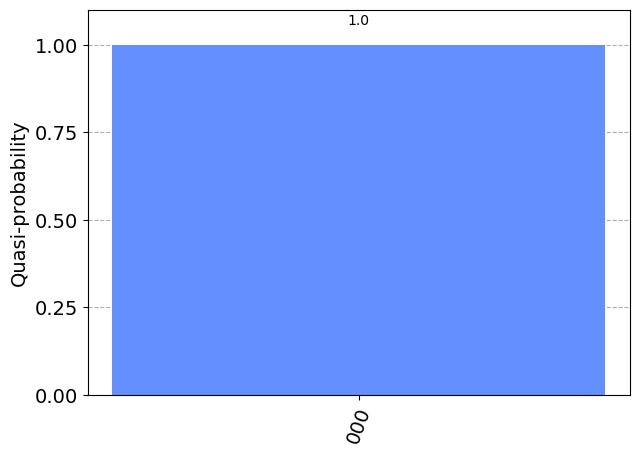

In [5]:
# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply CCNOT gate
ccz_gate(qc, 0, 1, 2)

# Visualize the circuit
print(qc)

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
result = execute(compiled_circuit, simulator).result()
statevector = result.get_statevector()

# Print the final statevector
print("Final Statevector:", statevector)

# Plot the probability amplitudes
plot_histogram(result.get_counts())

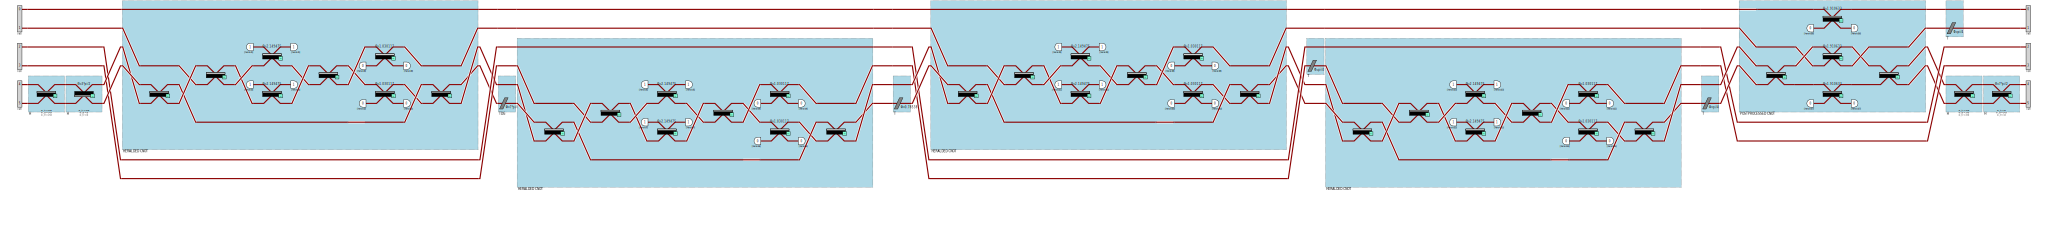

In [7]:
# qiskit_converter = QiskitConverter(catalog, backend_name="Naive")
qiskit_converter = QiskitConverter(catalog, backend_name="SLOS")
# qiskit_converter = QiskitConverter(catalog, backend_name="CliffordClifford2017")
quantum_processor = qiskit_converter.convert(qc, use_postselection=True)
pcvl.pdisplay(quantum_processor, recursive=True)

In [8]:
mapping = {pcvl.BasicState('|1,0,1,0,1,0>'): '000',
            pcvl.BasicState('|1,0,1,0,0,1>'): '001',
            pcvl.BasicState('|1,0,0,1,1,0>'): '010',
            pcvl.BasicState('|1,0,0,1,0,1>'): '011',
            pcvl.BasicState('|0,1,1,0,1,0>'): '100',
            pcvl.BasicState('|0,1,1,0,0,1>'): '101',
            pcvl.BasicState('|0,1,0,1,1,0>'): '110',
            pcvl.BasicState('|0,1,0,1,0,1>'): '111'}

target = {"000": "000", "001": "001", "010": "010", "011": "011",
            "100": "100", "101": "101", "110": "111", "111": "110"}

In [ ]:
ca = pcvl.algorithm.Analyzer(quantum_processor, mapping)
ca.compute(expected=target)
pcvl.pdisplay(ca)
print(f"performance = {pcvl.simple_float(ca.performance)[1]}, fidelity = {ca.fidelity*100}%")